In [4]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.layers import Dense
print(pd.__version__)

# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout
from sklearn.metrics import mean_absolute_error

2.0.3


In [5]:
pd.options.display.max_columns = None

In [6]:
columns = ['Date', 'Season', 'Vụ nuôi', 'module_name', 'ao', 
           'Ngày thả', 'Time','Nhiệt độ', 'pH', 'Độ mặn', 
           'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong','Độ kiềm', 
           'Độ cứng','Loại ao', 'Công nghệ nuôi', 'area', 
           'Giống tôm', 'Tuổi tôm', 'Mực nước', 'Amoni', 
           'Nitrat', 'Nitrit', 'Silica', 'Canxi', 'Kali', 'Magie']

input_col = ['Season', 'Ngày thả', 'Nhiệt độ', 'pH', 'Độ mặn', 
           'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong', 
           'Loại ao', 'Công nghệ nuôi', 'area', 
           'Giống tôm', 'Tuổi tôm', 'Mực nước']

In [3]:
df = pd.read_csv("./../dataset/data1.csv")

In [4]:
df.head()

,Date,Season,Vụ nuôi,module_name,ao,Ngày thả,Time,Nhiệt độ,pH,Độ mặn,TDS,Độ đục,DO,Độ màu,Độ trong,Độ kiềm,Độ cứng,Amoni,Nitrat,Nitrit,Phosphate (PO43-),Silica,Canxi,Kali,Magie,Nhiệt độ.1,pH.1,Độ mặn.1,TDS.1,Độ đục.1,DO.1,Độ màu.1,Độ trong.1,Độ kiềm.1,Độ cứng.1,Amoni.1,Nitrat.1,Nitrit.1,Phosphate (PO43-).1,Silica.1,Canxi.1,Kali.1,Magie.1,F1,F2,F3,F4,F5,WQI,Loại ao,Công nghệ nuôi,Giai doan,area,Giống tôm,Số lượng post,Tuổi tôm,Con/Kg,Mực nước,Thay nước (cm)
0,21/6/2022,Rainy,Vụ 1-2022,A1,D3N6,69,8,29.53,7.33,21.53,21.77,39.48,4.54,273.0,19.0,130.0,3500.0,16.00,4.4,0.73,7.6,1.84,488.50,370.50,788.00,1.0,1.0,1.0,0.75,0.90,0.23,0.83,0.08,0.26,0.11,0.37,0.94,0.99,0.03,0.94,0.60,0.38,0.37,0.3708,0.1547,0.0538,0.0525,0.0090,0.64,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,321750.0,78.00,55.00,75.0,0.0
1,20/6/2022,Rainy,Vụ 1-2022,A1,D3N6,68,8,29.65,7.40,21.34,21.77,38.12,5.02,435.0,19.0,119.0,3500.0,9.15,0.0,0.60,2.7,1.84,328.50,285.50,1017.25,1.0,1.0,1.0,0.75,0.90,0.34,0.73,0.08,0.22,0.11,0.64,1.00,0.99,0.21,0.94,0.33,0.25,0.49,0.3726,0.1549,0.0423,0.0526,0.0192,0.64,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,NaN,79.00,NaN,60.0,0.0
2,19/6/2022,Rainy,Vụ 1-2022,A1,D3N6,67,8,29.51,7.44,21.18,21.63,37.85,5.16,440.0,19.0,118.0,4000.0,8.36,0.0,0.51,5.1,2.28,508.75,371.50,901.00,1.0,1.0,1.0,0.75,0.90,0.37,0.72,0.08,0.22,0.21,0.67,1.00,0.99,0.05,0.93,0.64,0.38,0.43,0.3822,0.1554,0.0576,0.0526,0.0164,0.66,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,NaN,76.00,NaN,61.0,0.0
3,18/6/2022,Rainy,Vụ 1-2022,A1,D3N6,66,8,30.51,7.50,21.54,21.95,29.13,5.21,468.0,19.0,115.0,4000.0,7.36,0.0,0.30,1.2,2.96,454.50,353.50,690.00,1.0,1.0,1.0,0.75,0.93,0.38,0.71,0.08,0.21,0.21,0.71,1.00,0.99,0.09,0.90,0.54,0.36,0.31,0.3812,0.1538,0.0483,0.0532,0.0182,0.65,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,NaN,77.00,NaN,61.0,10.0
4,17/6/2022,Rainy,Vụ 1-2022,A1,D3N6,65,8,30.18,7.51,21.55,21.96,25.62,5.07,438.0,20.0,112.0,3500.0,8.80,1.0,0.45,8.4,9.10,458.75,329.75,806.00,1.0,1.0,1.0,0.75,0.94,0.35,0.73,0.10,0.20,0.11,0.65,0.99,0.99,0.05,0.67,0.55,0.32,0.38,0.3691,0.1414,0.0495,0.0539,0.0159,0.63,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,NaN,74.00,NaN,60.0,0.0


In [5]:
# df.info()

In [6]:
df.columns

Index(['Date', 'Season', 'Vụ nuôi', 'module_name', 'ao', 'Ngày thả', 'Time',
       'Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong',
       'Độ kiềm', 'Độ cứng', 'Amoni', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
       'Silica', 'Canxi', 'Kali', 'Magie', 'Nhiệt độ.1', 'pH.1', 'Độ mặn.1',
       'TDS.1', 'Độ đục.1', 'DO.1', 'Độ màu.1', 'Độ trong.1', 'Độ kiềm.1',
       'Độ cứng.1', 'Amoni.1', 'Nitrat.1', 'Nitrit.1', 'Phosphate (PO43-).1',
       'Silica.1', 'Canxi.1', 'Kali.1', 'Magie.1', 'F1', 'F2', 'F3', 'F4',
       'F5', 'WQI', 'Loại ao', 'Công nghệ nuôi', 'Giai doan', 'area',
       'Giống tôm', 'Số lượng post', 'Tuổi tôm', 'Con/Kg', 'Mực nước',
       'Thay nước (cm)'],
      dtype='object')

In [7]:

df = df[columns]

In [8]:
df.columns

Index(['Date', 'Season', 'Vụ nuôi', 'module_name', 'ao', 'Ngày thả', 'Time',
       'Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong',
       'Độ kiềm', 'Độ cứng', 'Loại ao', 'Công nghệ nuôi', 'area', 'Giống tôm',
       'Tuổi tôm', 'Mực nước', 'Amoni', 'Nitrat', 'Nitrit', 'Silica', 'Canxi',
       'Kali', 'Magie'],
      dtype='object')

In [9]:
df.rename({'Amoni':'TAN'},axis=1,inplace=True)

In [10]:
# Cột 'Mực nước', thay các ô có giá trị = 0 thành NaN
# Thay các giá trị NaN bằng median của cột

df.loc[df['Mực nước']==0,'Mực nước']=np.NaN
df['Mực nước'].fillna(df['Mực nước'].median(),
                      inplace=True)

In [11]:
df.isna().sum().sum()

0

In [12]:
df.drop(['Time'], axis=1,inplace=True)

In [13]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [14]:
# convert 'Tuoi tom' column to numeric
# cell which is not able to convert to float (#REF) will be fill as NaN
df['Tuổi tôm'] = df['Tuổi tôm'].apply(lambda x: 
                                      int(float(x)) if x.replace('.','',1).isnumeric() 
                                      else np.NaN)

In [15]:
df['units'] = df.apply(lambda x:  f"{x['Vụ nuôi'].replace(' ','')}-{x['module_name']}-{x['ao']}" ,axis=1)
df.drop(['Vụ nuôi','module_name','ao'],axis=1,inplace=True)

# Sort data by unit and date
df.sort_values(['units','Date'],inplace=True)

In [16]:
df.dropna(axis=0,inplace=True)

In [17]:
categorical_col = ['Date','Season', 'Loại ao', 'Công nghệ nuôi', 'Giống tôm','units']
df_num = df.drop(categorical_col,axis=1)

In [18]:
df1 = df[(np.abs(stats.zscore(df_num))<3).all(axis=1)].copy()

In [19]:
# lastday columns
# Tạo thêm cột lastday-column chứa dữ liệu của ngày hôm trước
# trong mỗi hàng, khởi tạo các cột với giá trị NaN
#

output_column = ['TAN', 'Nitrat', 'Nitrit', 'Silica', 'Canxi', 'Kali', 'Magie', 'Độ kiềm', 'Độ cứng']

ld_column = [f"ld_{col}" for col in output_column]
df[ld_column] = np.NaN

# Copy data của ngày hôm trước cho mỗi row
unit_l = list(df['units'].unique())
for unit in unit_l:
    df.loc[df['units']==unit,ld_column] = df.loc[df['units']==unit,output_column].shift(1).to_numpy(copy=True)

In [20]:
df.dropna(axis=0,inplace=True)

In [21]:
(np.abs(stats.zscore(df_num['Magie']))<3)

68      True
67      True
66      True
65      True
64      True
       ...  
552    False
551    False
550     True
549    False
548     True
Name: Magie, Length: 1167, dtype: bool

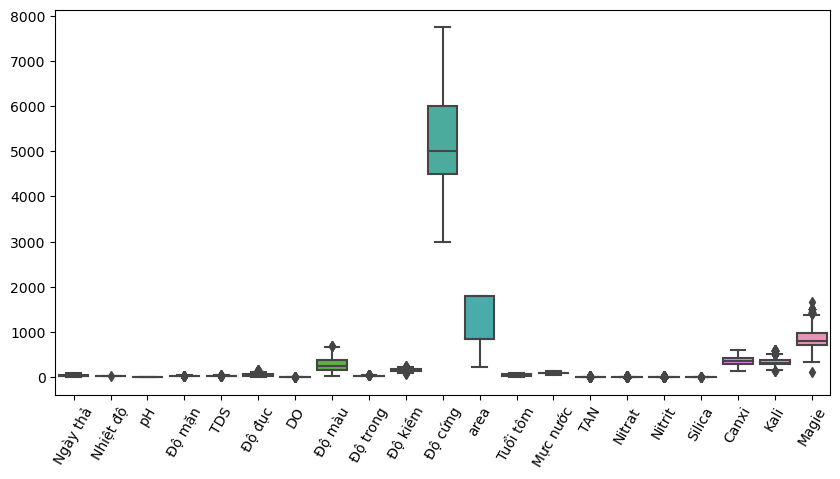

In [22]:
fig= plt.figure(figsize=(10,5))
ax = sns.boxplot(df1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

In [23]:
df

,Date,Season,Ngày thả,Nhiệt độ,pH,Độ mặn,TDS,Độ đục,DO,Độ màu,Độ trong,Độ kiềm,Độ cứng,Loại ao,Công nghệ nuôi,area,Giống tôm,Tuổi tôm,Mực nước,TAN,Nitrat,Nitrit,Silica,Canxi,Kali,Magie,units,ld_TAN,ld_Nitrat,ld_Nitrit,ld_Silica,ld_Canxi,ld_Kali,ld_Magie,ld_Độ kiềm,ld_Độ cứng
67,2022-04-15,Dry,2,28.76,8.36,28.04,27.85,20.26,6.48,108.0,23.0,167.0,4000.0,Rectangle,Vèo 1,232.0,Vietuc,11.0,100.0,0.54,0.0,0.00,4.85,323.50,287.00,1018.00,Vụ1-2022-A1-D3N6,0.94,0.0,0.00,3.95,506.20,509.00,1050.00,179.0,6000.0
66,2022-04-16,Dry,3,30.64,8.35,27.17,27.83,50.78,6.19,137.0,24.0,190.0,5500.0,Rectangle,Vèo 1,232.0,Vietuc,12.0,100.0,0.64,0.0,0.00,4.00,319.00,266.00,959.75,Vụ1-2022-A1-D3N6,0.54,0.0,0.00,4.85,323.50,287.00,1018.00,167.0,4000.0
65,2022-04-17,Dry,4,29.02,8.30,28.00,27.81,34.36,6.33,198.0,24.0,181.0,5000.0,Rectangle,Vèo 1,232.0,Vietuc,13.0,100.0,0.64,0.0,0.00,0.85,340.25,296.75,1049.25,Vụ1-2022-A1-D3N6,0.64,0.0,0.00,4.00,319.00,266.00,959.75,190.0,5500.0
64,2022-04-18,Dry,5,28.79,8.28,28.23,28.02,35.12,6.29,377.0,24.0,229.0,5500.0,Rectangle,Vèo 1,232.0,Vietuc,14.0,100.0,3.16,0.0,0.00,1.80,486.25,534.75,980.00,Vụ1-2022-A1-D3N6,0.64,0.0,0.00,0.85,340.25,296.75,1049.25,181.0,5000.0
63,2022-04-19,Dry,6,28.33,8.23,28.39,28.16,58.76,6.39,340.0,24.0,203.0,5500.0,Rectangle,Vèo 1,232.0,Vietuc,15.0,100.0,1.84,0.0,0.00,2.00,320.25,269.00,969.50,Vụ1-2022-A1-D3N6,3.16,0.0,0.00,1.80,486.25,534.75,980.00,229.0,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,2022-03-03,Dry,66,25.94,7.93,36.73,35.47,22.88,6.74,225.0,35.0,142.0,6500.0,Circle,Nuôi 2,834.0,Vietuc,77.0,100.0,2.84,0.0,0.04,0.77,596.20,669.00,1900.00,Vụ3-2021-A14-A14N9,4.36,0.0,0.00,0.40,475.80,499.80,1516.00,138.0,7000.0
551,2022-03-04,Dry,67,26.04,7.92,36.62,35.38,23.93,6.94,281.0,33.0,141.0,6500.0,Circle,Nuôi 2,834.0,Vietuc,78.0,100.0,1.64,0.0,0.02,0.50,576.40,539.40,1844.00,Vụ3-2021-A14-A14N9,2.84,0.0,0.04,0.77,596.20,669.00,1900.00,142.0,6500.0
550,2022-03-05,Dry,68,26.05,8.21,36.21,35.07,122.53,7.15,305.0,32.0,140.0,6750.0,Circle,Nuôi 2,834.0,Vietuc,79.0,100.0,3.04,0.0,0.03,0.65,475.80,499.80,1516.00,Vụ3-2021-A14-A14N9,1.64,0.0,0.02,0.50,576.40,539.40,1844.00,141.0,6500.0
549,2022-03-06,Dry,69,25.78,8.16,35.30,34.24,28.83,7.26,346.0,29.0,131.0,6000.0,Circle,Nuôi 2,834.0,Vietuc,80.0,100.0,0.40,0.0,0.08,0.45,596.20,669.00,1900.00,Vụ3-2021-A14-A14N9,3.04,0.0,0.03,0.65,475.80,499.80,1516.00,140.0,6750.0


In [24]:
# df[df['units']==unit_l[0]][output_column].shift(1)

In [25]:
# unit=unit_l[0]
# df.loc[df['units']==unit,ld_column] = df.loc[df['units']==unit,output_column].shift(1).to_numpy(copy=True)

In [26]:
# df.loc[df['units']==unit,ld_column] = df.loc[df['units']==unit,output_column].shift(1).to_numpy(copy=True)

In [27]:
# df[300:330]

In [28]:
# df.isna().sum()

In [29]:
df.dropna(axis=0,inplace=True)

In [30]:
input_col = ['Season', 'Ngày thả', 'Nhiệt độ', 'pH', 'Độ mặn', 
           'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong', 
           'Loại ao', 'Công nghệ nuôi', 'area', 
           'Giống tôm', 'Tuổi tôm', 'Mực nước']
df = df[input_col+ld_column+output_column].copy()

In [31]:
df.reset_index(drop=True,inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          1149 non-null   object 
 1   Ngày thả        1149 non-null   int64  
 2   Nhiệt độ        1149 non-null   float64
 3   pH              1149 non-null   float64
 4   Độ mặn          1149 non-null   float64
 5   TDS             1149 non-null   float64
 6   Độ đục          1149 non-null   float64
 7   DO              1149 non-null   float64
 8   Độ màu          1149 non-null   float64
 9   Độ trong        1149 non-null   float64
 10  Loại ao         1149 non-null   object 
 11  Công nghệ nuôi  1149 non-null   object 
 12  area            1149 non-null   float64
 13  Giống tôm       1149 non-null   object 
 14  Tuổi tôm        1149 non-null   float64
 15  Mực nước        1149 non-null   float64
 16  ld_TAN          1149 non-null   float64
 17  ld_Nitrat       1149 non-null   f

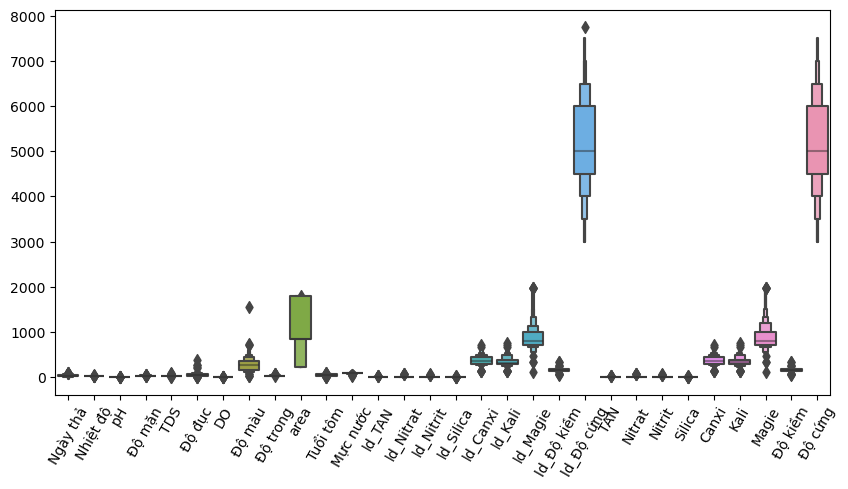

In [33]:
plt.figure(figsize=(10,5))
sns.boxenplot(df)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

plt.show()

In [ ]:
# 

In [42]:
categorical_col = ['Season', 'Loại ao', 'Công nghệ nuôi', 'Giống tôm']
oh_enc = OneHotEncoder(sparse_output=False)
oh_enc.fit(df[categorical_col])

OneHotEncoder(sparse_output=False)

In [43]:
oh_df = pd.DataFrame(oh_enc.transform(df[categorical_col]),
                     columns=oh_enc.get_feature_names_out()
                    )

In [44]:
df = pd.concat([oh_df,df],axis=1)

In [45]:
df.drop(categorical_col,inplace=True,axis=1)

In [46]:
X = df.drop(output_column, axis=1)
y = df[output_column]

In [47]:
X.columns

Index(['Season_Dry', 'Season_Rainy', 'Loại ao_Circle', 'Loại ao_Rectangle',
       'Công nghệ nuôi_Nuôi 1', 'Công nghệ nuôi_Nuôi 2',
       'Công nghệ nuôi_Vèo 1', 'Công nghệ nuôi_Vèo 2', 'Giống tôm_MPNT',
       'Giống tôm_Vietuc', 'Ngày thả', 'Nhiệt độ', 'pH', 'Độ mặn', 'TDS',
       'Độ đục', 'DO', 'Độ màu', 'Độ trong', 'area', 'Tuổi tôm', 'Mực nước',
       'ld_TAN', 'ld_Nitrat', 'ld_Nitrit', 'ld_Silica', 'ld_Canxi', 'ld_Kali',
       'ld_Magie', 'ld_Độ kiềm', 'ld_Độ cứng'],
      dtype='object')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.33, random_state=42)

In [49]:
X_sc = StandardScaler()
X_sc.fit(X_train)
X_train_tf = X_sc.transform(X_train)

y_sc = StandardScaler()
y_sc.fit(y_train)
y_train_tf = y_sc.transform(y_train)


In [50]:
rf = MultiOutputRegressor(RandomForestRegressor(max_depth=100, random_state=0))
rf.fit(X_train_tf,y_train_tf)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=100,
                                                     random_state=0))

In [51]:
rf.score(X_sc.transform(X_test),y_sc.transform(y_test))

0.5039044193123303

In [52]:
y_pred = rf.predict(X_sc.transform(X_test))

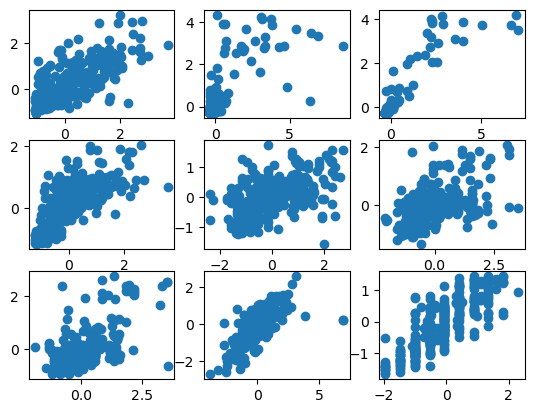

In [53]:
for i in range(y_pred.shape[1]):
    plt.subplot(3,3,i+1)
    plt.scatter(y_sc.transform(y_test)[:,i],y_pred[:,i])

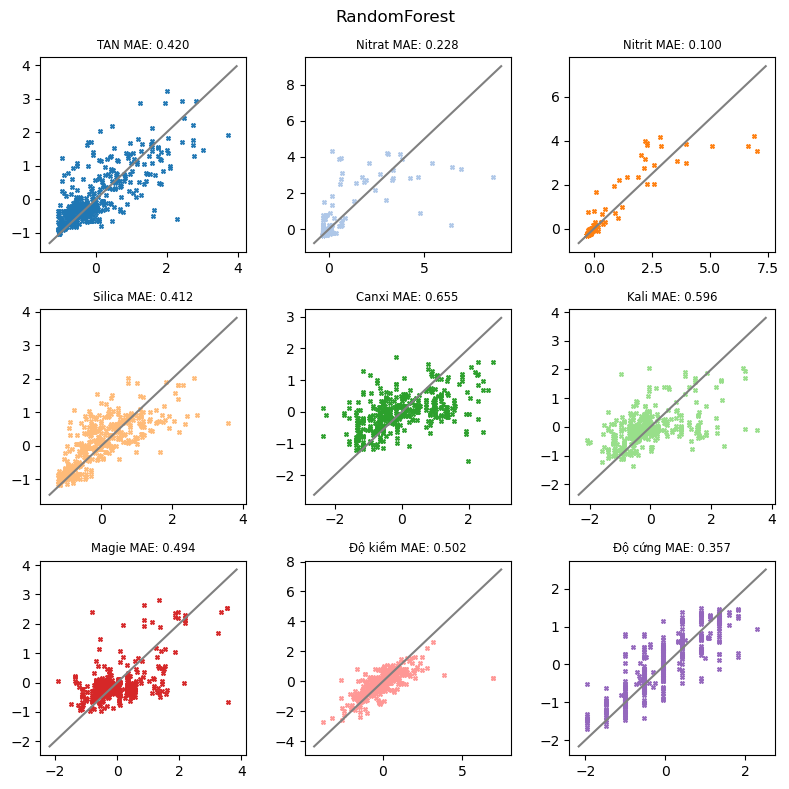

In [55]:
fig = plt.figure(figsize = [8,8])
for i,col in enumerate(output_column):
    plt.subplot(3,3,i+1)
    plt.scatter(x=y_sc.transform(y_test)[:,i],
                y=y_pred[:,i],
                marker = 'X',
                lw=0.5,
                s=10,
                color=matplotlib.cm.tab20.colors[i])
    lim = [plt.xlim()[0],plt.xlim()[1]]
    plt.plot(lim,lim,
             color='grey')
    plt.title(col+f" MAE: {mean_absolute_error(y_sc.transform(y_test)[:,i],y_pred[:,i]):.3f}",
              fontsize='small')
    
fig.suptitle("RandomForest")       
plt.tight_layout()
plt.show()

In [56]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout
from sklearn.metrics import mean_absolute_error

In [57]:
# # define the model
# model1 = Sequential()
# model1.add(Input(shape=(31,)))
# model1.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
# model1.add(Dropout(0.1))
# model1.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
# model1.add(Dropout(0.1))
# model1.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
# model1.add(Dropout(0.1))
# model1.add(Dense(7))
# model1.compile(loss='mae', optimizer='adam')

In [58]:
# define the model
model1 = Sequential()
model1.add(Input(shape=(31,)))
model1.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(32,kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(9))
model1.compile(loss='mae', optimizer='adam')

In [59]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,809 (18.79 KB)

 Trainable params: 4,809 (18.79 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model1.fit(X_train_tf,y_train_tf,
          epochs=500,
          batch_size=16,
          verbose=False)

In [61]:
y_pred1 = model1.predict(X_sc.transform(X_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


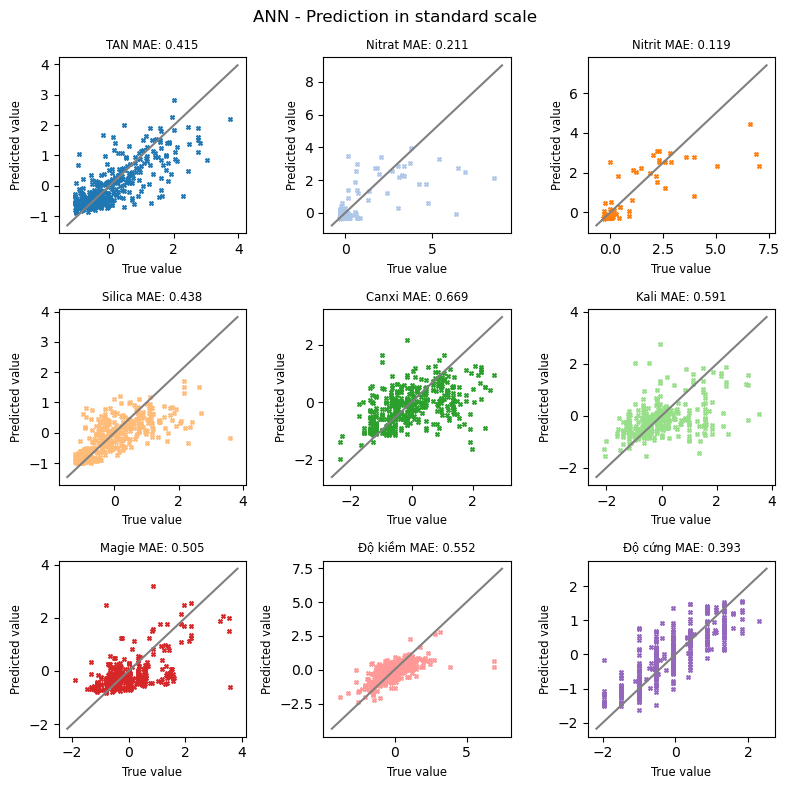

In [62]:
fig = plt.figure(figsize = [8,8])
for i,col in enumerate(output_column):
    plt.subplot(3,3,i+1)
    plt.scatter(x=y_sc.transform(y_test)[:,i],
                y=y_pred1[:,i],
                marker = 'X',
                lw=0.5,
                s=10,
                color=matplotlib.cm.tab20.colors[i])
    
    lim = [plt.xlim()[0],plt.xlim()[1]]
    plt.plot(lim,lim,
             color='grey')
    plt.xlabel('True value',fontsize='small')
    plt.ylabel('Predicted value',fontsize='small')
    plt.title(col+f" MAE: {mean_absolute_error(y_sc.transform(y_test)[:,i],y_pred1[:,i]):.3f}",
              fontsize='small')
    
fig.suptitle("ANN - Prediction in standard scale")       
plt.tight_layout()
plt.show()

In [63]:
y_sc.inverse_transform(y_pred1)

array([[ 3.0936348e+00, -1.4281636e-02,  2.6560185e-02, ...,
         8.4806274e+02,  1.6042258e+02,  5.2630190e+03],
       [ 5.6486959e+00,  1.5195906e+00,  3.8799024e-01, ...,
         9.3861768e+02,  1.4710548e+02,  4.1009546e+03],
       [ 2.2131305e+00,  6.1429688e-03, -4.9042801e-04, ...,
         7.1276245e+02,  1.7926093e+02,  5.3335879e+03],
       ...,
       [ 5.9864225e+00, -1.8091088e-02,  1.9481242e-01, ...,
         6.8413770e+02,  1.6312500e+02,  4.6032808e+03],
       [ 2.5565281e+00, -8.2720574e-03,  8.3434572e-03, ...,
         7.4713586e+02,  1.4163113e+02,  5.3613711e+03],
       [ 2.3296907e+00,  2.6748890e+01,  1.9836233e+01, ...,
         8.6117340e+02,  1.0774999e+02,  3.5193491e+03]], dtype=float32)

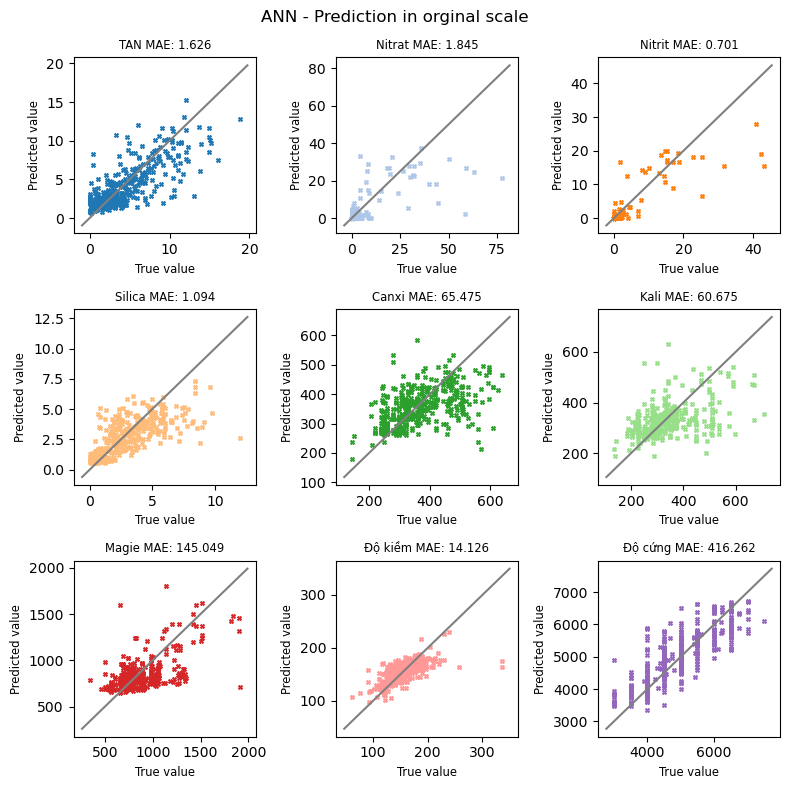

In [64]:
fig = plt.figure(figsize = [8,8])
for i,col in enumerate(output_column):
    plt.subplot(3,3,i+1)
    plt.scatter(x=y_test[col],
                y=y_sc.inverse_transform(y_pred1)[:,i],
                marker = 'X',
                lw=0.5,
                s=10,
                color=matplotlib.cm.tab20.colors[i])
    
    lim = [plt.xlim()[0],plt.xlim()[1]]
    plt.plot(lim,lim,
             color='grey')
    
    plt.xlabel('True value',fontsize='small')
    plt.ylabel('Predicted value',fontsize='small')
    plt.title(col+f" MAE: {mean_absolute_error(y_test[col],y_sc.inverse_transform(y_pred1)[:,i]):.3f}",
              fontsize='small')
    
fig.suptitle("ANN - Prediction in orginal scale")       
plt.tight_layout()
plt.show()

'Season', 'Loại ao', 'Công nghệ nuôi', 'Giống tôm', 'Ngày thả', 
'Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu', 
'Độ trong', 'area', 'Tuổi tôm', 'Mực nước', 'ld_TAN',

'ld_Nitrat', 'ld_Nitrit', 'ld_Silica', 'ld_Canxi', 'ld_Kali',
'ld_Magie', 'ld_Độ kiềm', 'ld_Độ cứng'

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 9)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,809 (18.79 KB)

 Trainable params: 4,809 (18.79 KB)

 Non-trainable params: 0 (0.00 B)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


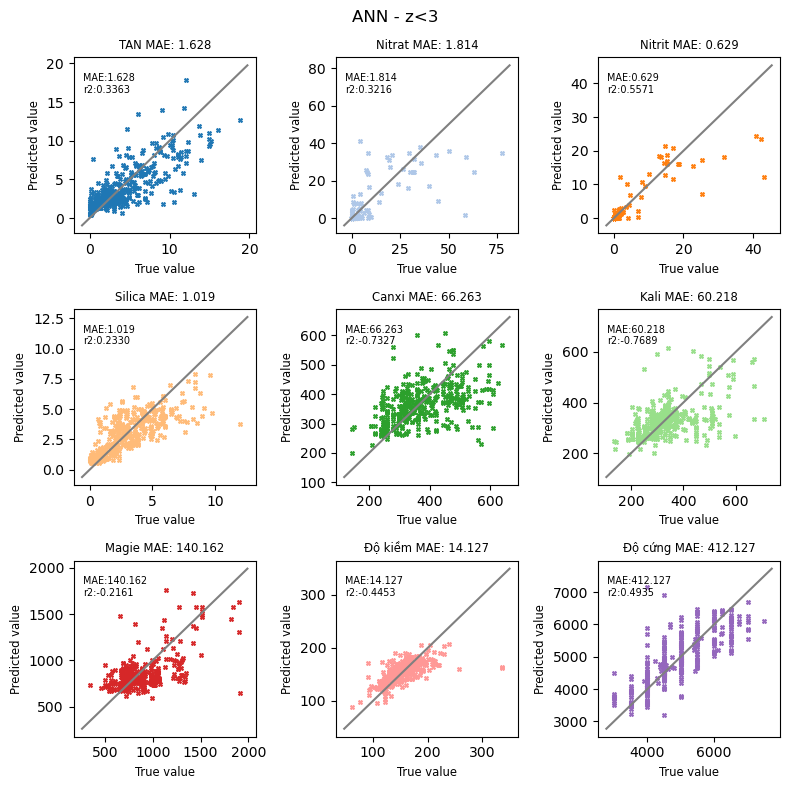

In [11]:
zscore_lim = 3

df = pd.read_csv("./../dataset/data1.csv")
df = df[columns]

df.rename({'Amoni':'TAN'},axis=1,inplace=True)

df.loc[df['Mực nước']==0,'Mực nước']=np.NaN
df['Mực nước'].fillna(df['Mực nước'].median(),
                      inplace=True)

df.drop(['Time'], axis=1,inplace=True)
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

# convert 'Tuoi tom' column to numeric
# cell which is not able to convert to float (#REF) will be fill as NaN
df['Tuổi tôm'] = df['Tuổi tôm'].apply(lambda x: 
                                      int(float(x)) if x.replace('.','',1).isnumeric() 
                                      else np.NaN)

df['units'] = df.apply(lambda x:  f"{x['Vụ nuôi'].replace(' ','')}-{x['module_name']}-{x['ao']}" ,axis=1)
df.drop(['Vụ nuôi','module_name','ao'],axis=1,inplace=True)

# Sort data by unit and date
df.sort_values(['units','Date'],inplace=True)

df.dropna(axis=0,inplace=True)

categorical_col = ['Date','Season', 'Loại ao', 'Công nghệ nuôi', 'Giống tôm','units']
df_num = df.drop(categorical_col,axis=1)

df1 = df[(np.abs(stats.zscore(df_num))<zscore_lim).all(axis=1)].copy()

# lastday columns
# Tạo thêm cột lastday-column chứa dữ liệu của ngày hôm trước
# trong mỗi hàng, khởi tạo các cột với giá trị NaN
output_column = ['TAN', 'Nitrat', 'Nitrit', 'Silica', 'Canxi', 'Kali', 'Magie', 'Độ kiềm', 'Độ cứng']
ld_column = [f"ld_{col}" for col in output_column]
df[ld_column] = np.NaN
# Copy data của ngày hôm trước cho mỗi row
unit_l = list(df['units'].unique())
for unit in unit_l:
    df.loc[df['units']==unit,ld_column] = df.loc[df['units']==unit,output_column].shift(1).to_numpy(copy=True)
    
df.dropna(axis=0,inplace=True)

input_col = ['Season', 'Ngày thả', 'Nhiệt độ', 'pH', 'Độ mặn', 
           'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong', 
           'Loại ao', 'Công nghệ nuôi', 'area', 
           'Giống tôm', 'Tuổi tôm', 'Mực nước']
df = df[input_col+ld_column+output_column].copy()

df.reset_index(drop=True,inplace=True)


categorical_col = ['Season', 'Loại ao', 'Công nghệ nuôi', 'Giống tôm']
oh_enc = OneHotEncoder(sparse_output=False)
oh_enc.fit(df[categorical_col])
oh_df = pd.DataFrame(oh_enc.transform(df[categorical_col]),
                     columns=oh_enc.get_feature_names_out()
                    )

df = pd.concat([oh_df,df],axis=1)

df.drop(categorical_col,inplace=True,axis=1)
X = df.drop(output_column, axis=1)
y = df[output_column]
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.33, random_state=42)

X_sc = StandardScaler()
X_sc.fit(X_train)
X_train_tf = X_sc.transform(X_train)

y_sc = StandardScaler()
y_sc.fit(y_train)
y_train_tf = y_sc.transform(y_train)


# define the model
model1 = Sequential()
model1.add(Input(shape=(31,)))
model1.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(32,kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(9))
model1.compile(loss='mae', optimizer='adam')

model1.summary()

model1.fit(X_train_tf,y_train_tf,
          epochs=500,
          batch_size=16,
          verbose=False)

y_pred1 = model1.predict(X_sc.transform(X_test))


fig = plt.figure(figsize = [8,8])
for i,col in enumerate(output_column):
    plt.subplot(3,3,i+1)
    plt.scatter(x=y_test[col],
                y=y_sc.inverse_transform(y_pred1)[:,i],
                marker = 'X',
                lw=0.5,
                s=10,
                color=matplotlib.cm.tab20.colors[i])
    
    lim = [plt.xlim()[0],plt.xlim()[1]]
    plt.plot(lim,lim,
             color='grey')
    
    plt.xlabel('True value',fontsize='small')
    plt.ylabel('Predicted value',fontsize='small')
    plt.title(col+f" MAE: {mean_absolute_error(y_test[col],y_sc.inverse_transform(y_pred1)[:,i]):.3f}",
              fontsize='small')
    
    xtext = plt.xlim()[0] + (plt.xlim()[1]-plt.xlim()[0])*0.05
    ytext = plt.ylim()[0] + (plt.ylim()[1]-plt.ylim()[0])*0.8
    s=f"MAE:{mean_absolute_error(y_test[col],y_sc.inverse_transform(y_pred1)[:,i]):.3f}\n"+\
                                   f"r2:{r2_score(y_sc.inverse_transform(y_pred1)[:,i],y_test[col]):.4f}"
    plt.text(x=xtext, y=ytext, s=s, fontsize='x-small')
    
fig.suptitle(f"ANN - z<{zscore_lim}")       
plt.tight_layout()
plt.show()

In [147]:
[r2_score(y_sc.inverse_transform(y_pred1)[:,i],y_test.iloc[:,i]) for i in range(9)]

[0.2273134818562461,
 0.39057569657373226,
 0.6945414557088128,
 -0.05368645773063818,
 -0.7570225077442252,
 -0.7196438464412576,
 -0.12006755934649882,
 -0.6443192626359626,
 0.548528316918167]

## Remove outlier with zscore > 2 

In [66]:
# columns

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,809 (18.79 KB)

 Trainable params: 4,809 (18.79 KB)

 Non-trainable params: 0 (0.00 B)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


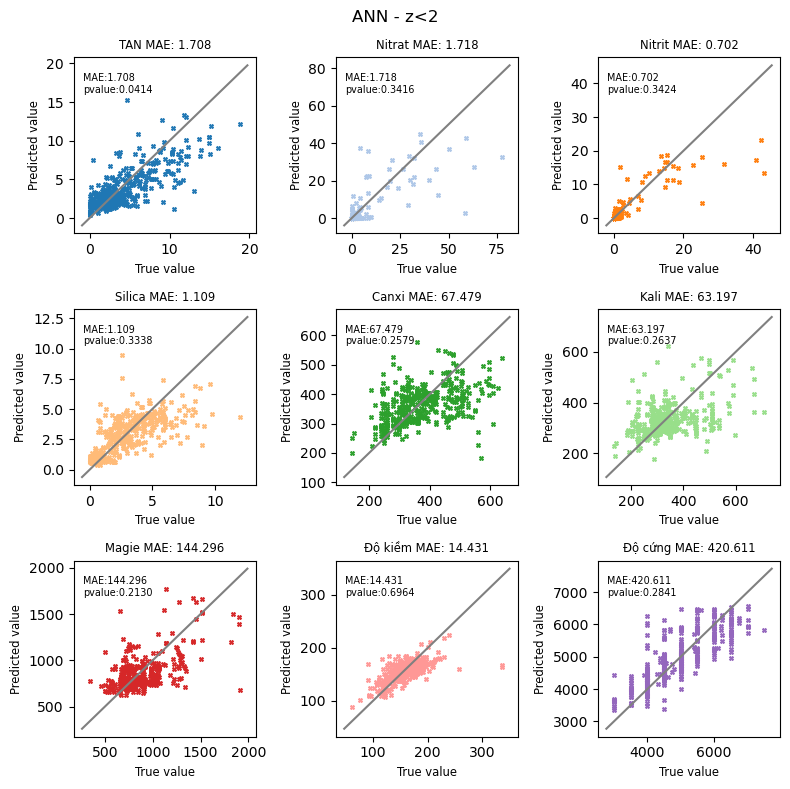

In [7]:
zscore_lim = 2

df = pd.read_csv("./../dataset/data1.csv")
df = df[columns]

df.rename({'Amoni':'TAN'},axis=1,inplace=True)

df.loc[df['Mực nước']==0,'Mực nước']=np.NaN
df['Mực nước'].fillna(df['Mực nước'].median(),
                      inplace=True)

df.drop(['Time'], axis=1,inplace=True)
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

# convert 'Tuoi tom' column to numeric
# cell which is not able to convert to float (#REF) will be fill as NaN
df['Tuổi tôm'] = df['Tuổi tôm'].apply(lambda x: 
                                      int(float(x)) if x.replace('.','',1).isnumeric() 
                                      else np.NaN)

df['units'] = df.apply(lambda x:  f"{x['Vụ nuôi'].replace(' ','')}-{x['module_name']}-{x['ao']}" ,axis=1)
df.drop(['Vụ nuôi','module_name','ao'],axis=1,inplace=True)

# Sort data by unit and date
df.sort_values(['units','Date'],inplace=True)

df.dropna(axis=0,inplace=True)

categorical_col = ['Date','Season', 'Loại ao', 'Công nghệ nuôi', 'Giống tôm','units']
df_num = df.drop(categorical_col,axis=1)

df1 = df[(np.abs(stats.zscore(df_num))<zscore_lim).all(axis=1)].copy()

# lastday columns
# Tạo thêm cột lastday-column chứa dữ liệu của ngày hôm trước
# trong mỗi hàng, khởi tạo các cột với giá trị NaN
output_column = ['TAN', 'Nitrat', 'Nitrit', 'Silica', 'Canxi', 'Kali', 'Magie', 'Độ kiềm', 'Độ cứng']
ld_column = [f"ld_{col}" for col in output_column]
df[ld_column] = np.NaN
# Copy data của ngày hôm trước cho mỗi row
unit_l = list(df['units'].unique())
for unit in unit_l:
    df.loc[df['units']==unit,ld_column] = df.loc[df['units']==unit,output_column].shift(1).to_numpy(copy=True)
    
df.dropna(axis=0,inplace=True)

input_col = ['Season', 'Ngày thả', 'Nhiệt độ', 'pH', 'Độ mặn', 
           'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong', 
           'Loại ao', 'Công nghệ nuôi', 'area', 
           'Giống tôm', 'Tuổi tôm', 'Mực nước']
df = df[input_col+ld_column+output_column].copy()

df.reset_index(drop=True,inplace=True)


categorical_col = ['Season', 'Loại ao', 'Công nghệ nuôi', 'Giống tôm']
oh_enc = OneHotEncoder(sparse_output=False)
oh_enc.fit(df[categorical_col])
oh_df = pd.DataFrame(oh_enc.transform(df[categorical_col]),
                     columns=oh_enc.get_feature_names_out()
                    )

df = pd.concat([oh_df,df],axis=1)

df.drop(categorical_col,inplace=True,axis=1)
X = df.drop(output_column, axis=1)
y = df[output_column]
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.33, random_state=42)

X_sc = StandardScaler()
X_sc.fit(X_train)
X_train_tf = X_sc.transform(X_train)

y_sc = StandardScaler()
y_sc.fit(y_train)
y_train_tf = y_sc.transform(y_train)


# define the model
model1 = Sequential()
model1.add(Input(shape=(31,)))
model1.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(32,kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(9))
model1.compile(loss='mae', optimizer='adam')

model1.summary()

model1.fit(X_train_tf,y_train_tf,
          epochs=500,
          batch_size=16,
          verbose=False)

y_pred1 = model1.predict(X_sc.transform(X_test))


fig = plt.figure(figsize = [8,8])
for i,col in enumerate(output_column):
    plt.subplot(3,3,i+1)
    plt.scatter(x=y_test[col],
                y=y_sc.inverse_transform(y_pred1)[:,i],
                marker = 'X',
                lw=0.5,
                s=10,
                color=matplotlib.cm.tab20.colors[i])
    
    lim = [plt.xlim()[0],plt.xlim()[1]]
    plt.plot(lim,lim,
             color='grey')
    
    plt.xlabel('True value',fontsize='small')
    plt.ylabel('Predicted value',fontsize='small')
    plt.title(col+f" MAE: {mean_absolute_error(y_test[col],y_sc.inverse_transform(y_pred1)[:,i]):.3f}",
              fontsize='small')
    
    xtext = plt.xlim()[0] + (plt.xlim()[1]-plt.xlim()[0])*0.05
    ytext = plt.ylim()[0] + (plt.ylim()[1]-plt.ylim()[0])*0.8
    s=f"MAE:{mean_absolute_error(y_test[col],y_sc.inverse_transform(y_pred1)[:,i]):.3f}\n"+\
                                   f"pvalue:{stats.ttest_ind(y_sc.inverse_transform(y_pred1)[:,i],y_test[col]).pvalue:.4f}"
    plt.text(x=xtext, y=ytext, s=s, fontsize='x-small')
    
fig.suptitle(f"ANN - z<{zscore_lim}")      
plt.tight_layout()
plt.show()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 9)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,809 (18.79 KB)

 Trainable params: 4,809 (18.79 KB)

 Non-trainable params: 0 (0.00 B)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


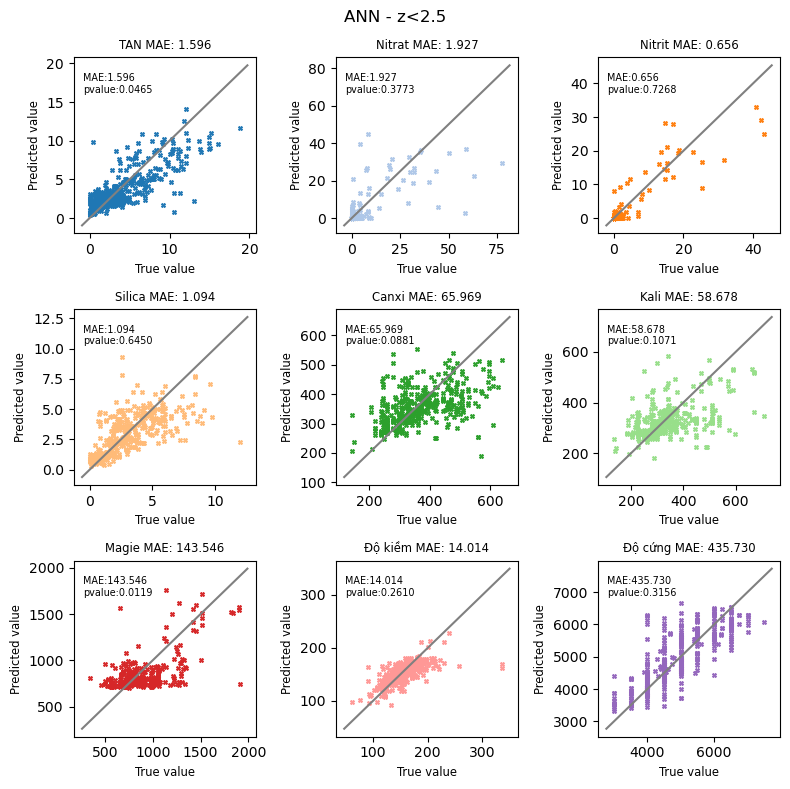

In [10]:
zscore_lim = 2.5

df = pd.read_csv("./../dataset/data1.csv")
df = df[columns]

df.rename({'Amoni':'TAN'},axis=1,inplace=True)

df.loc[df['Mực nước']==0,'Mực nước']=np.NaN
df['Mực nước'].fillna(df['Mực nước'].median(),
                      inplace=True)

df.drop(['Time'], axis=1,inplace=True)
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

# convert 'Tuoi tom' column to numeric
# cell which is not able to convert to float (#REF) will be fill as NaN
df['Tuổi tôm'] = df['Tuổi tôm'].apply(lambda x: 
                                      int(float(x)) if x.replace('.','',1).isnumeric() 
                                      else np.NaN)

df['units'] = df.apply(lambda x:  f"{x['Vụ nuôi'].replace(' ','')}-{x['module_name']}-{x['ao']}" ,axis=1)
df.drop(['Vụ nuôi','module_name','ao'],axis=1,inplace=True)

# Sort data by unit and date
df.sort_values(['units','Date'],inplace=True)

df.dropna(axis=0,inplace=True)

categorical_col = ['Date','Season', 'Loại ao', 'Công nghệ nuôi', 'Giống tôm','units']
df_num = df.drop(categorical_col,axis=1)

df1 = df[(np.abs(stats.zscore(df_num))<zscore_lim).all(axis=1)].copy()

# lastday columns
# Tạo thêm cột lastday-column chứa dữ liệu của ngày hôm trước
# trong mỗi hàng, khởi tạo các cột với giá trị NaN
output_column = ['TAN', 'Nitrat', 'Nitrit', 'Silica', 'Canxi', 'Kali', 'Magie', 'Độ kiềm', 'Độ cứng']
ld_column = [f"ld_{col}" for col in output_column]
df[ld_column] = np.NaN
# Copy data của ngày hôm trước cho mỗi row
unit_l = list(df['units'].unique())
for unit in unit_l:
    df.loc[df['units']==unit,ld_column] = df.loc[df['units']==unit,output_column].shift(1).to_numpy(copy=True)
    
df.dropna(axis=0,inplace=True)

input_col = ['Season', 'Ngày thả', 'Nhiệt độ', 'pH', 'Độ mặn', 
           'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong', 
           'Loại ao', 'Công nghệ nuôi', 'area', 
           'Giống tôm', 'Tuổi tôm', 'Mực nước']
df = df[input_col+ld_column+output_column].copy()

df.reset_index(drop=True,inplace=True)


categorical_col = ['Season', 'Loại ao', 'Công nghệ nuôi', 'Giống tôm']
oh_enc = OneHotEncoder(sparse_output=False)
oh_enc.fit(df[categorical_col])
oh_df = pd.DataFrame(oh_enc.transform(df[categorical_col]),
                     columns=oh_enc.get_feature_names_out()
                    )

df = pd.concat([oh_df,df],axis=1)

df.drop(categorical_col,inplace=True,axis=1)
X = df.drop(output_column, axis=1)
y = df[output_column]
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.33, random_state=42)

X_sc = StandardScaler()
X_sc.fit(X_train)
X_train_tf = X_sc.transform(X_train)

y_sc = StandardScaler()
y_sc.fit(y_train)
y_train_tf = y_sc.transform(y_train)


# define the model
model1 = Sequential()
model1.add(Input(shape=(31,)))
model1.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(32,kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(9))
model1.compile(loss='mae', optimizer='adam')

model1.summary()

model1.fit(X_train_tf,y_train_tf,
          epochs=500,
          batch_size=16,
          verbose=False)

y_pred1 = model1.predict(X_sc.transform(X_test))


fig = plt.figure(figsize = [8,8])
for i,col in enumerate(output_column):
    plt.subplot(3,3,i+1)
    plt.scatter(x=y_test[col],
                y=y_sc.inverse_transform(y_pred1)[:,i],
                marker = 'X',
                lw=0.5,
                s=10,
                color=matplotlib.cm.tab20.colors[i])
    
    lim = [plt.xlim()[0],plt.xlim()[1]]
    plt.plot(lim,lim,
             color='grey')
    
    plt.xlabel('True value',fontsize='small')
    plt.ylabel('Predicted value',fontsize='small')
    plt.title(col+f" MAE: {mean_absolute_error(y_test[col],y_sc.inverse_transform(y_pred1)[:,i]):.3f}",
              fontsize='small')
    
    xtext = plt.xlim()[0] + (plt.xlim()[1]-plt.xlim()[0])*0.05
    ytext = plt.ylim()[0] + (plt.ylim()[1]-plt.ylim()[0])*0.8
    s=f"MAE:{mean_absolute_error(y_test[col],y_sc.inverse_transform(y_pred1)[:,i]):.3f}\n"+\
                                   f"pvalue:{stats.ttest_ind(y_sc.inverse_transform(y_pred1)[:,i],y_test[col]).pvalue:.4f}"
    plt.text(x=xtext, y=ytext, s=s, fontsize='x-small')
    
fig.suptitle(f"ANN - z<{zscore_lim}")      
plt.tight_layout()
plt.show()



## 